<a href="https://colab.research.google.com/github/seoeunkong/MachineLearning/blob/main/chapter04_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
#타깃 데이터로 사용할 Species 열을 제외한 나머지는 입력 데이터로 사용한다.
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
#데이터를 훈련 세트와 테스트 세트로 나눔.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
#표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
#확률적 경사 하강법을 제공하는 대표적은 분류용 클래스는 SGDClassifier
from sklearn.linear_model import SGDClassifier

# loss는 손실 함수의 종류를 지정한다. 여기에서 loss='log'로 지정하여 로지스틱 손실 함수를 지정했다. 
# max_iter는 수행할 에포크 횟수를 지정한다. 10으로 지정하여 전체 훈련 세트를 10으로 반복
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
#위의 출력된 훈련 세트와 테스트 세트 정확도가 낮다. 
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
#훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해 주어야 한다. 
# 이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만든다. 
#또 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비하자.

import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
#300번의 에포크 동안 훈련을 반복하여 진행해 보자. 
#반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score, test_score 리스트에 추가
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

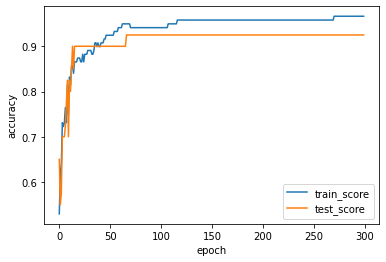

In [ ]:
#300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그리기
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_score','test_score'])
plt.show()

In [ ]:
#반복 횟수를 100으로 맞추고 다시 훈련
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
#힌지 손실
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
